# Lecture 9 Proof of Stake

In [1]:
#Import statements
import hashlib as hasher
import random
import time
import matplotlib.pyplot as plt

def hashbits(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    #print(type(inputbytes))
    hash_obj.update(inputbytes)
    hashbytes = hash_obj.digest()
    return ''.join(f'{x:08b}' for x in hashbytes)

def hash(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    #print(type(inputbytes))
    hash_obj.update(inputbytes)
    return hash_obj.hexdigest()

In [2]:
####### Drawing blockchain, not important
from IPython.display import HTML, display
from IPython.html.widgets.interaction import interact

def maxHeight(parent):
  if len(parent.children) == 0:
    return parent.height 
  max = 0
  for child in parent.children:
    m = maxHeight(child)
    if m> max:
      max = m
  return max
  

def drawBlockchain(parent, level, html, parentLevel, childN = 0, total = 0):
  color = "#AEF751"
  if parentLevel!=-1:
    color = "#7EDBF6"
  parent.children.sort(key=lambda x: (maxHeight(x)), reverse=True)
  xx = childN
  level += childN
  html += '<g>'
  html += '<rect x="'+str(30+ 100*parent.height)+'" y="'+str(30+ 100*level)+'" width="60" height="60" stroke="black" stroke-width="1" fill="'+color+'" />'
  html += '<text x="'+str((60+ 100*parent.height))+'" y="'+str((60+ 100*level))+'" dominant-baseline="middle" text-anchor="middle" font-family="Verdana" font-size="10" font-weight="bold" fill="black">'+str(parent.creator.name)+'</text>'
  if parentLevel != -1:
    if (parent.previous.children.index(parent)) == 0:
      html += '<line stroke-width="1px" stroke="#000000"  x1='+str(30+ 100*parent.height)+' y1="'+str(60+ 100*level)+'" x2="'+str(95+ 100*parent.previous.height)+'" y2="'+str(60+ 100*parentLevel)+'" style="marker-end: url(#markerArrow)"/>'
    else:
      html += '<line stroke-width="1px" stroke="#000000"  x1='+str(30+ 100*parent.height)+' y1="'+str(60+ 100*level)+'" x2="'+str(65+ 100*parent.previous.height)+'" y2="'+str(95+ 100*parentLevel)+'" style="marker-end: url(#markerArrow)"/>'
  html += '</g>'
  l = level
  childN = 0
  for child in parent.children:
    html,n, t = drawBlockchain(child, l, html, level, childN, total)
    if n > 0:
      childN += n
    if t > 0:
      total += t
    l = l+1
  return html, childN+ len(parent.children)-1, total+ len(parent.children)-1


def show(bc):
  htmll = ""
  html = ""
  htmll, n, t = drawBlockchain(bc.chain[0], 0, html, -1)
  html = '<svg height="'+str(115*(n+1))+'" width="'+str(130*maxHeight(bc.chain[0]))+'">'
  html += '<defs><marker id="markerArrow" markerWidth="10" markerHeight="10" refX="2" refY="6" orient="auto"><path d="M2,2 L2,11 L10,6 L2,2" style="fill: #000000;" /> </marker> </defs>'
  html += htmll
  html += '</svg>'
  display(HTML(html))

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Exercise 1

### Proof of Stake

PoS is one of the widely used alternatives for PoW. In the PoS the mining power is replaced with stakes.  

- Below there are stubs for Blockchain, Block, and Minter. Each block has a property as the timestamp it was created on. Note the hash_block function. 
- Complete isSmaller function to return 'True' if the first 15 bits of the block hash is valid based on blockchain difficulty and minter stake. 
- Complete PoSSolver function. Note that each minter gets to try once per each time interval. 

In [5]:
class Block:
    def __init__(self, data, creator=None, previous=None, time=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            self.creator = Minter(0 , "0")
            self.height = 0
        else:
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
            self.height = previous.height+1
        self.timestamp = time
        self.hash = self.hash_block()
        self.children = []

    def hash_block(self):
        return hashbits(self.creator.name + self.previous_hash + str(self.timestamp))

    def print(self):
      print(self.data + " "+ self.creator.name + " " + str(self.height))
        
class Blockchain:
    def __init__(self, genesis_data, difficulty):
        self.chain = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0

    def lastBlock(self):
      max = self.chain[0]
      for block in self.chain:
        if block.height > max.height:
          max = block
      return max
        
    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size +=1
        newBlock.creator.stake+=1
    
    def isSmaller(self, hashStr, stake):
      #add this function
      #use int(hashStr[0:15],2) to convert the first 15 bits to int 
      if int(hashStr[0:15],2) < self.difficulty * stake:
        return True
      return False

    def checkMiner(self, miner):
      last = self.lastBlock()
      count = 0
      while last!=None:
        if last.creator == miner:
          count += 1
        last = last.previous
      return count

class Minter:
  def __init__(self, stake, name, blockchain=None):
    self.stake = stake
    self.name = name
    self.blockchain = blockchain
    if self.blockchain != None:
      self.lastBlock = blockchain.lastBlock()

  def updateLast(self):
    latest = self.blockchain.lastBlock()
    if latest.height > self.lastBlock.height:
        self.lastBlock = latest

  def PoSSolver(self, seconds):
    #add this function
    newBlock = Block(str(self.blockchain.size), self, self.lastBlock, seconds)
    h = newBlock.hash_block()
    if self.blockchain.isSmaller(h,self.stake):
      self.blockchain.add(newBlock)
      self.lastBlock = newBlock

bc = Blockchain("0" , 0.1)
m1 = Minter(10 ,"m1", bc)
m2 = Minter(15, "m2", bc)
m3 = Minter(20, "m3", bc)
m4 = Minter(12, "m4", bc)
start_time = time.time()
while bc.size < 60:
  seconds = (time.time() - start_time)
  m1.updateLast()
  m1.PoSSolver(seconds)
  m2.updateLast()
  m2.PoSSolver(seconds)
  m3.updateLast()
  m3.PoSSolver(seconds)
  m4.updateLast()
  m4.PoSSolver(seconds)

print(m1.stake)
print(m2.stake)
print(m3.stake)
print(m4.stake)

21
21
43
32


In [ ]:
show(bc)

## Exercise 2

### Rich get richer!

Draw a chart to show minters stakes over rounds. Calculate the minters stake for each block that is appended to the chain. Try out different maximum blockchain sizes. Does the rich get richer? 

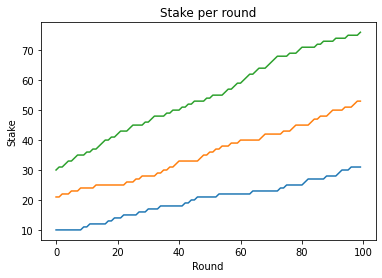

In [7]:
bc = Blockchain("0" , 1)
m1 = Minter(10 ,"m1", bc)
m2 = Minter(20, "m2", bc)
m3 = Minter(30, "m3", bc)
start_time = time.time()
ms1 = []
ms2 = []
ms3 = []
count = list(range(0, 100))
while bc.size < 101:
  if bc.size > len(ms1):
  #complete here
    ms1.append(m1.stake)
    ms2.append(m2.stake)
    ms3.append(m3.stake)
  seconds = (time.time() - start_time)
  m1.updateLast()
  m1.PoSSolver(seconds)
  m2.updateLast()
  m2.PoSSolver(seconds)
  m3.updateLast()
  m3.PoSSolver(seconds)

plt.plot(count, ms1)
plt.plot(count, ms2)
plt.plot(count, ms3)
plt.title('Stake per round')
plt.xlabel('Round')
plt.ylabel('Stake')
plt.show()

## Exercise 3

### Coin age

One solution for rich get richer problem is using coin age. Coin age is calculated based on how many days the stakes are freezed. When a minter generates a block, the coin age resets. 

* add lastBlockGeneratedBy function in a way that returns the last block that is generated by a given minter. If the minter has not generated any blocks yet, return genesis. 
* Modify PoSSolver function in a way that takes coin age into account other than stakes. 
* Redo the previous experiment. How coin age affects the system?


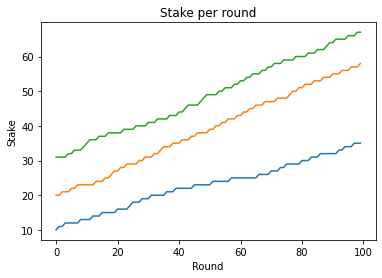

In [9]:
class Blockchain:
    def __init__(self, genesis_data, difficulty):
        self.chain = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0

    def lastBlock(self):
      max = self.chain[0]
      for block in self.chain:
        if block.height > max.height:
          max = block
      return max
        
    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size +=1
        newBlock.creator.stake+=1
    
    def isSmaller(self, hashStr, stake):
      #add this function
      if int(hashStr[0:15],2) < self.difficulty * stake:
        return True
      return False

    def checkMiner(self, miner):
      last = self.lastBlock()
      count = 0
      while last!=None:
        if last.creator == miner:
          count += 1
        last = last.previous
      return count

    def lastBlockGeneratedBy(self, minter):
      #add this function
      last = self.lastBlock()
      while last.previous != None:
        if last.creator == minter:
          return last
        last = last.previous
      return last

class Minter:
  def __init__(self, stake, name, blockchain=None):
    self.stake = stake
    self.name = name
    self.blockchain = blockchain
    if self.blockchain != None:
      self.lastBlock = blockchain.lastBlock()

  def updateLast(self):
    latest = self.blockchain.lastBlock()
    if latest.height > self.lastBlock.height:
        self.lastBlock = latest

  def PoSSolver(self, seconds):
    #add this function
    newBlock = Block(str(self.blockchain.size), self, self.lastBlock, seconds)
    h = newBlock.hash_block()
    coinAge = self.lastBlock.height - self.blockchain.lastBlockGeneratedBy(self).height + 1
    if self.blockchain.isSmaller(h,self.stake*coinAge):
      self.blockchain.add(newBlock)
      self.lastBlock = newBlock

bc = Blockchain("0" , 1)
m1 = Minter(10 ,"m1", bc)
m2 = Minter(20, "m2", bc)
m3 = Minter(30, "m3", bc)
start_time = time.time()
ms1 = []
ms2 = []
ms3 = []
count = list(range(0, 100))
while bc.size < 101:
  if bc.size > len(ms1):
  #complete here
    ms1.append(m1.stake)
    ms2.append(m2.stake)
    ms3.append(m3.stake)
  seconds = (time.time() - start_time)
  m1.updateLast()
  m1.PoSSolver(seconds)
  m2.updateLast()
  m2.PoSSolver(seconds)
  m3.updateLast()
  m3.PoSSolver(seconds)

plt.plot(count, ms1)
plt.plot(count, ms2)
plt.plot(count, ms3)
plt.title('Stake per round')
plt.xlabel('Round')
plt.ylabel('Stake')
plt.show()